In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv("incident_event_log.csv")
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [5]:
data['number']=data['number'].astype('category')
data['incident_state']=data['incident_state'].astype('category')
data['caller_id']=data['caller_id'].astype('category')
data['opened_by']=data['opened_by'].astype('category')
data['opened_at']=data['opened_at'].astype('category')
data['sys_created_by']=data['sys_created_by'].astype('category')
data['sys_created_at']=data['sys_created_at'].astype('category')
data['sys_updated_by']=data['sys_updated_by'].astype('category')
data['sys_updated_at']=data['sys_updated_at'].astype('category')
data['contact_type']=data['contact_type'].astype('category')
data['location']=data['location'].astype('category')
data['category']=data['category'].astype('category')
data['subcategory']=data['subcategory'].astype('category')
data['u_symptom']=data['u_symptom'].astype('category')
data['cmdb_ci']=data['cmdb_ci'].astype('category')
data['impact']=data['impact'].astype('category')
data['urgency']=data['urgency'].astype('category')
data['priority']=data['priority'].astype('category')
data['assignment_group']=data['assignment_group'].astype('category')
data['assigned_to']=data['assigned_to'].astype('category')
data['notify']=data['notify'].astype('category')
data['problem_id']=data['problem_id'].astype('category')
data['rfc']=data['rfc'].astype('category')
data['vendor']=data['vendor'].astype('category')
data['caused_by']=data['caused_by'].astype('category')
data['closed_code']=data['closed_code'].astype('category')
data['resolved_by']=data['resolved_by'].astype('category')
data['resolved_at']=data['resolved_at'].astype('category')
data['closed_at']=data['closed_at'].astype('category')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   number                   141712 non-null  category
 1   incident_state           141712 non-null  category
 2   active                   141712 non-null  bool    
 3   reassignment_count       141712 non-null  int64   
 4   reopen_count             141712 non-null  int64   
 5   sys_mod_count            141712 non-null  int64   
 6   made_sla                 141712 non-null  bool    
 7   caller_id                141712 non-null  category
 8   opened_by                141712 non-null  category
 9   opened_at                141712 non-null  category
 10  sys_created_by           141712 non-null  category
 11  sys_created_at           141712 non-null  category
 12  sys_updated_by           141712 non-null  category
 13  sys_updated_at           141712 non-null  ca

# Missing Value Analysis

In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   number                   141712 non-null  category
 1   incident_state           141712 non-null  category
 2   active                   141712 non-null  bool    
 3   reassignment_count       141712 non-null  int64   
 4   reopen_count             141712 non-null  int64   
 5   sys_mod_count            141712 non-null  int64   
 6   made_sla                 141712 non-null  bool    
 7   caller_id                141712 non-null  category
 8   opened_by                141712 non-null  category
 9   opened_at                141712 non-null  category
 10  sys_created_by           141712 non-null  category
 11  sys_created_at           141712 non-null  category
 12  sys_updated_by           141712 non-null  category
 13  sys_updated_at           141712 non-null  ca

In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
df.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [11]:
missing_val = pd.DataFrame(df.isnull().sum())

In [12]:
missing_val

,0
number,0
incident_state,0
active,0
reassignment_count,0
reopen_count,0
sys_mod_count,0
made_sla,0
caller_id,29
opened_by,4835
opened_at,0


In [13]:
missing_val = missing_val.reset_index()

In [14]:
#rename the variable
missing_val = missing_val.rename(columns={'index':'var',0:'missing_value_percentage'})
#calculating percentage
missing_val['missing_value_percentage'] = missing_val['missing_value_percentage']/len(df)*100
missing_val = missing_val.sort_values('missing_value_percentage',ascending=False).reset_index(drop=True)
missing_val.head(11)

,var,missing_value_percentage
0,caused_by,99.983770
1,vendor,99.827820
2,cmdb_ci,99.685983
3,rfc,99.300694
4,problem_id,98.380518
5,sys_created_at,37.453427
6,sys_created_by,37.453427
7,u_symptom,23.261262
8,assigned_to,19.402732
9,assignment_group,10.029496


In [15]:
# Dropping Clomns with more than 90% missing values and dropping some more on domain knowledge
drop = ['caller_id','sys_created_by','sys_created_at','contact_type','cmdb_ci','u_symptom','assignment_group','assigned_to','knowledge','u_priority_confirmation','caused_by', 'rfc', 'vendor','urgency','priority','notify','problem_id']
df.drop(drop,axis=1,inplace=True)

In [16]:
df.isna().sum()

number                   0
incident_state           0
active                   0
reassignment_count       0
reopen_count             0
sys_mod_count            0
made_sla                 0
opened_by             4835
opened_at                0
sys_updated_by           0
sys_updated_at           0
location                76
category                78
subcategory            111
impact                   0
closed_code            714
resolved_by            226
resolved_at           3141
closed_at                0
dtype: int64

In [17]:
cateogry_columns=df.select_dtypes(include=['category']).columns.tolist()
integer_columns=df.select_dtypes(include=['bool']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cateogry_columns):
            df[column]=data[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].mean)

In [18]:
df.isna().sum()

number                0
incident_state        0
active                0
reassignment_count    0
reopen_count          0
sys_mod_count         0
made_sla              0
opened_by             0
opened_at             0
sys_updated_by        0
sys_updated_at        0
location              0
category              0
subcategory           0
impact                0
closed_code           0
resolved_by           0
resolved_at           0
closed_at             0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   number              141712 non-null  category
 1   incident_state      141712 non-null  category
 2   active              141712 non-null  bool    
 3   reassignment_count  141712 non-null  int64   
 4   reopen_count        141712 non-null  int64   
 5   sys_mod_count       141712 non-null  int64   
 6   made_sla            141712 non-null  bool    
 7   opened_by           141712 non-null  category
 8   opened_at           141712 non-null  category
 9   sys_updated_by      141712 non-null  category
 10  sys_updated_at      141712 non-null  category
 11  location            141712 non-null  category
 12  category            141712 non-null  category
 13  subcategory         141712 non-null  category
 14  impact              141712 non-null  category
 15  closed_code      

# LABEL ENCODING

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['number']=label.fit_transform(df.number)
df['incident_state']=label.fit_transform(df.incident_state)
df['active']=label.fit_transform(df.active)
df['made_sla']=label.fit_transform(df.made_sla)
df['opened_by']=label.fit_transform(df.opened_by)
df['location']=label.fit_transform(df.location)
df['category']=label.fit_transform(df.category)
df['subcategory']=label.fit_transform(df.subcategory)
df['closed_code']=label.fit_transform(df.closed_code)
df['resolved_by']=label.fit_transform(df.resolved_by)
df['reassignment_count']=label.fit_transform(df.reassignment_count)
df['reopen_count']=label.fit_transform(df.reopen_count)
df['sys_mod_count']=label.fit_transform(df.sys_mod_count)
df['opened_at']=label.fit_transform(df.opened_at)
df['sys_updated_by']=label.fit_transform(df.sys_updated_by)
df['sys_updated_at']=label.fit_transform(df.sys_updated_at)
df['impact']=label.fit_transform(df.impact)
df['resolved_at']=label.fit_transform(df.resolved_at)
df['closed_at']=label.fit_transform(df.closed_at)

In [21]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_by,opened_at,sys_updated_by,sys_updated_at,location,category,subcategory,impact,closed_code,resolved_by,resolved_at,closed_at
0,0,7,1,0,0,0,1,201,12990,104,33112,44,47,70,1,13,52,12244,2209
1,0,8,1,0,0,2,1,201,12990,509,33150,44,47,70,1,13,52,12244,2209
2,0,8,1,0,0,3,1,201,12990,658,33241,44,47,70,1,13,52,12244,2209
3,0,6,0,0,0,4,1,201,12990,762,41838,44,47,70,1,13,52,12244,2209
4,1,7,1,0,0,0,1,121,12991,605,33113,63,31,113,1,13,197,40,2317


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   number              141712 non-null  int32
 1   incident_state      141712 non-null  int32
 2   active              141712 non-null  int64
 3   reassignment_count  141712 non-null  int64
 4   reopen_count        141712 non-null  int64
 5   sys_mod_count       141712 non-null  int64
 6   made_sla            141712 non-null  int64
 7   opened_by           141712 non-null  int32
 8   opened_at           141712 non-null  int32
 9   sys_updated_by      141712 non-null  int32
 10  sys_updated_at      141712 non-null  int32
 11  location            141712 non-null  int32
 12  category            141712 non-null  int32
 13  subcategory         141712 non-null  int32
 14  impact              141712 non-null  int32
 15  closed_code         141712 non-null  int32
 16  resolved_by         

# Balancing the dataset

In [23]:
X= df.iloc[:,df.columns!='impact']
Y =df.impact

In [24]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [25]:
print('Original dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({1: 134335, 2: 3886, 0: 3491})


In [26]:
smt = SMOTE(random_state= 42)

# Splitting the dataset

In [27]:
from fast_ml.model_development import train_valid_test_split

X_train, Y_train, X_valid, Y_valid, X_test, Y_test = train_valid_test_split(df, target ='impact', train_size=0.8, valid_size=0.1, test_size=0.1)

In [28]:
print(X_train.shape), print(Y_train.shape)
print(X_test.shape), print(Y_test.shape)
print (X_valid.shape), print(Y_valid.shape)

(113369, 18)
(113369,)
(14172, 18)
(14172,)
(14171, 18)
(14171,)


(None, None)

In [29]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,Y_train_1,Y_test_1 = train_test_split(X_train,Y_train,test_size=0.2, random_state=42)

In [30]:
X_res, Y_res = smt.fit_resample(X_train_1, Y_train_1)

Class=0, n=85974 (33.333%)


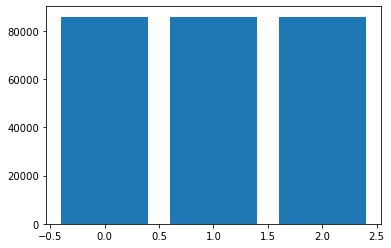

In [31]:
# summarize distribution
counter = Counter(Y_res)
for k,v in counter.items():
    per = v / len(Y_res) * 100
print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

# Feature selection on balanced data

In [32]:
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(score_func=chi2, k='all')
model_chi2 = chi2.fit(X_res, Y_res)

print(model_chi2.scores_)
features_select =model_chi2.transform(X_res)

[4.80793568e+07 4.80051703e+02 3.38904483e+02 5.83172207e+03
 1.69474530e+03 1.10158005e+04 4.99932160e+02 1.13389026e+06
 4.44818582e+06 2.03667542e+05 5.99270451e+06 6.67645494e+03
 1.36049197e+03 3.45688040e+04 8.49890308e+02 6.16531424e+04
 3.70089044e+06 1.00272808e+05]


In [33]:
features=np.array([5.28536993e+07 ,6.36200867e+02, 3.25402711e+02, 7.72880067e+03,
                   1.33119476e+03, 1.72260860e+04, 5.02038367e+02, 1.17949711e+06,
                   1.40113564e+07 ,1.69089462e+05, 9.51394545e+06, 1.46041410e+04,
                   7.60480909e+02 ,3.93255145e+04 ,1.05345261e+05 ,1.91918191e+05,
                   1.02783361e+03 ,9.19763868e+04 ,5.03129542e+06 ,7.00300960e+05])

In [34]:
features=pd.DataFrame(features)

<AxesSubplot:>

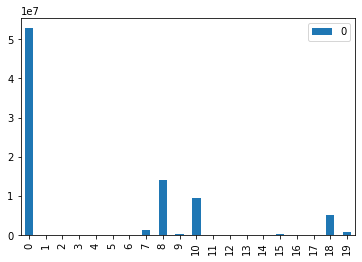

In [35]:
features.plot.bar()

In [36]:
array=np.array ([[23622,     7,     1, ...,   169,  1142,   676],
       [23148,     7,     1, ...,     4, 14456,  2524],
       [ 5983,     8,     1, ...,    11, 12751,  2222],
       ...,
       [ 4440,     7,     0, ...,    22, 15757,   637],
       [ 1984,     6,     0, ...,    54,  6066,  2029],
       [19912,     7,     1, ...,    37,  6138,  1357]],dtype=object)

# Feature Selection:Using Mutual info classifier

In [37]:
from sklearn.feature_selection import mutual_info_classif

mic = SelectKBest(score_func=mutual_info_classif, k='all')
model_mic=mic.fit(X_res, Y_res)
features_select = model_mic.transform(X_res)

Feature 0: 0.424343
Feature 1: 0.067311
Feature 2: 0.018225
Feature 3: 0.011793
Feature 4: 0.002127
Feature 5: 0.026208
Feature 6: 0.026637
Feature 7: 0.409795
Feature 8: 0.399570
Feature 9: 0.292556
Feature 10: 0.247360
Feature 11: 0.175386
Feature 12: 0.184065
Feature 13: 0.180320
Feature 14: 0.045381
Feature 15: 0.246124
Feature 16: 0.372339
Feature 17: 0.306826


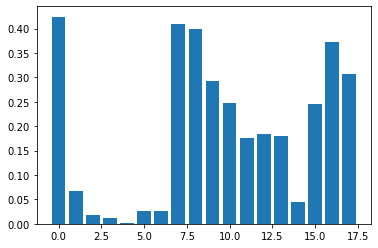

In [38]:
for i in range(len(model_mic.scores_)):
    print('Feature %d: %f' % (i, model_mic.scores_[i]))
    
plt.bar([i for i in range(len(model_mic.scores_))], model_mic.scores_)
plt.show()  

# Decision tree

In [39]:
from sklearn.tree import  DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_res,Y_res)

from sklearn.model_selection import cross_val_score
results = cross_val_score(model_dt,X_res, Y_res)
print(results.mean())

0.9746008703082507


Feature: 0, Score: 0.11417
Feature: 1, Score: 0.01954
Feature: 2, Score: 0.00403
Feature: 3, Score: 0.01262
Feature: 4, Score: 0.00061
Feature: 5, Score: 0.02367
Feature: 6, Score: 0.01610
Feature: 7, Score: 0.28995
Feature: 8, Score: 0.06958
Feature: 9, Score: 0.04579
Feature: 10, Score: 0.02602
Feature: 11, Score: 0.04508
Feature: 12, Score: 0.05222
Feature: 13, Score: 0.06457
Feature: 14, Score: 0.02678
Feature: 15, Score: 0.05774
Feature: 16, Score: 0.08552
Feature: 17, Score: 0.04602


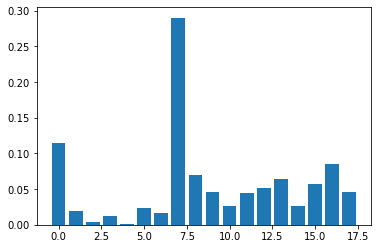

In [40]:
 #get importance
imp = model_dt.feature_importances_
#summarize feature importance
for i,v in enumerate(imp):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([a for a in range(len(imp))], imp)
plt.show()

# Final columns to be dropped are as follows¶

In [41]:
df.shape

(141712, 19)

In [42]:
df = df.drop(columns=['active', 'reassignment_count','reopen_count', 'sys_mod_count', 'made_sla', 'category','closed_code','location'])
df.shape

(141712, 11)

In [43]:
new_data =df

In [44]:
new_data.columns

Index(['number', 'incident_state', 'opened_by', 'opened_at', 'sys_updated_by',
       'sys_updated_at', 'subcategory', 'impact', 'resolved_by', 'resolved_at',
       'closed_at'],
      dtype='object')

In [45]:
new_data.head()

,number,incident_state,opened_by,opened_at,sys_updated_by,sys_updated_at,subcategory,impact,resolved_by,resolved_at,closed_at
0,0,7,201,12990,104,33112,70,1,52,12244,2209
1,0,8,201,12990,509,33150,70,1,52,12244,2209
2,0,8,201,12990,658,33241,70,1,52,12244,2209
3,0,6,201,12990,762,41838,70,1,52,12244,2209
4,1,7,121,12991,605,33113,113,1,197,40,2317


In [46]:
x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(new_data, target ='impact', train_size=0.8, valid_size=0.1, test_size=0.1)

In [47]:
print(x_train.shape), print( y_train.shape)
print(x_test.shape), print( y_test.shape)
print(x_valid.shape), print(y_valid.shape)

(113369, 10)
(113369,)
(14172, 10)
(14172,)
(14171, 10)
(14171,)


(None, None)

In [48]:
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(x_train,y_train,test_size=0.2, random_state=42)

In [49]:
print(x_train_1.shape), print(y_train_1.shape)

(90695, 10)
(90695,)


(None, None)

Class=0, n=2219 (2.447%)


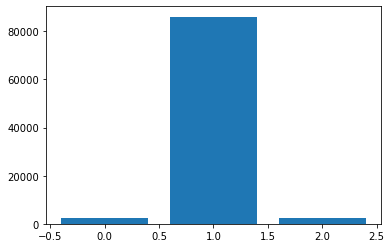

In [50]:
# summarize distribution
counter = Counter(y_train_1)
for k,v in counter.items():
    per = v / len(y_train_1) * 100
print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [51]:
x_res, y_res = smt.fit_resample(x_train_1, y_train_1)

Class=0, n=86037 (33.333%)


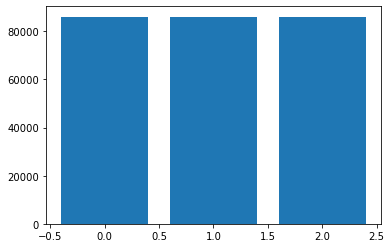

In [52]:
# summarize distribution
counter = Counter(y_res)
for k,v in counter.items():
    per = v / len(y_res) * 100
print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [53]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   number          141712 non-null  int32
 1   incident_state  141712 non-null  int32
 2   opened_by       141712 non-null  int32
 3   opened_at       141712 non-null  int32
 4   sys_updated_by  141712 non-null  int32
 5   sys_updated_at  141712 non-null  int32
 6   subcategory     141712 non-null  int32
 7   impact          141712 non-null  int32
 8   resolved_by     141712 non-null  int32
 9   resolved_at     141712 non-null  int32
 10  closed_at       141712 non-null  int32
dtypes: int32(11)
memory usage: 5.9 MB


# MODEL BUILDING ALGORITHMS

# Decision Tree

In [54]:
from sklearn.tree import  DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_res,y_res)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_dt.predict(x_test_1)
print(accuracy_score(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

#0-high
#1-medium
#2-low

0.9566904824909588
[[  400   143    16]
 [  482 20747   257]
 [    8    76   545]]
              precision    recall  f1-score   support

           0       0.45      0.72      0.55       559
           1       0.99      0.97      0.98     21486
           2       0.67      0.87      0.75       629

    accuracy                           0.96     22674
   macro avg       0.70      0.85      0.76     22674
weighted avg       0.97      0.96      0.96     22674



In [55]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model_dt,x_valid, y_valid, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.945 (0.004)


In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_dt.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9573807507761783
[[  258    94     9]
 [  264 12948   184]
 [    3    50   362]]


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
model_rf = RandomForestClassifier(n_estimators=num_trees)
model_rf.fit(x_res,y_res)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_rf.predict(x_test_1)
print(accuracy_score(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

0.980418100026462
[[  387   167     5]
 [   93 21299    94]
 [    3    82   544]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       559
           1       0.99      0.99      0.99     21486
           2       0.85      0.86      0.86       629

    accuracy                           0.98     22674
   macro avg       0.88      0.85      0.86     22674
weighted avg       0.98      0.98      0.98     22674



In [58]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model_rf,x_valid, y_valid, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.964 (0.006)


In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9789020604007903
[[  251   103     7]
 [   66 13259    71]
 [    3    49   363]]


# KNeighbour Classification

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knnclassifier = KNeighborsClassifier(n_neighbors=7)
knnclassifier.fit(x_train_1,y_train_1)
y_pred_knn = knnclassifier.predict(x_test_1)
metrics.accuracy_score(y_test_1,y_pred_knn)

0.9484431507453471

In [61]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=7)
print(cross_val_score(knnclassifier, X_test_1, Y_test_1, cv=10, scoring ='accuracy').mean())

0.9478698666318135


In [62]:
print(classification_report(y_test_1,y_pred_knn))

              precision    recall  f1-score   support

           0       0.48      0.16      0.24       559
           1       0.96      0.99      0.97     21486
           2       0.55      0.17      0.27       629

    accuracy                           0.95     22674
   macro avg       0.66      0.44      0.49     22674
weighted avg       0.93      0.95      0.94     22674



# Naive byes 

In [63]:
from sklearn.preprocessing import RobustScaler

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
print(x_test_1.shape)
print(y_test_1.shape)

(22674, 10)
(22674,)


In [66]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_res,y_res)

GaussianNB()

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_nb.predict(x_test_1)
print(accuracy_score(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

0.3171473934903414
[[ 253  140  166]
 [6560 6562 8364]
 [ 100  153  376]]
              precision    recall  f1-score   support

           0       0.04      0.45      0.07       559
           1       0.96      0.31      0.46     21486
           2       0.04      0.60      0.08       629

    accuracy                           0.32     22674
   macro avg       0.35      0.45      0.20     22674
weighted avg       0.91      0.32      0.44     22674



# SVM

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

model_svc= SVC(kernel='linear', probability=True, class_weight='balanced')
model_svc.fit(x_res,y_res)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model_svc.predict(x_test_1)
print(accuracy_score(y_test_1, y_pred))
print(confusion_matrix(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

# XGBClassifier

In [68]:
!pip install xgboost

In [69]:
!pip install lightgbm

In [70]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [71]:
# fit model to training data
model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(x_res, y_res)

[09:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [72]:
# make predictions for test data
y_pred_xgb = model.predict(x_test_1)
predictions = [round(value) for value in y_pred_xgb]

In [73]:
# evaluate predictions
accuracy = accuracy_score(y_test_1, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.71%


In [74]:
print(classification_report(y_test_1, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.14      0.59      0.22       559
           1       0.99      0.84      0.91     21486
           2       0.28      0.86      0.43       629

    accuracy                           0.84     22674
   macro avg       0.47      0.76      0.52     22674
weighted avg       0.95      0.84      0.88     22674



# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
classifier = LogisticRegression()
classifier.fit(x_res,y_res)

LogisticRegression()

In [77]:
y_pred_logis = classifier.predict(x_test_1)

In [78]:
print(accuracy_score(y_test_1, y_pred_logis))

0.2721619476051866


In [79]:
print(classification_report(y_test_1, y_pred_logis))

              precision    recall  f1-score   support

           0       0.03      0.57      0.07       559
           1       0.96      0.26      0.40     21486
           2       0.05      0.57      0.09       629

    accuracy                           0.27     22674
   macro avg       0.35      0.47      0.18     22674
weighted avg       0.91      0.27      0.39     22674



In [80]:
import pickle

In [81]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("randomforest.pkl","wb")
pickle.dump(model_rf, pickle_out)
pickle_out.close()